<h2>1. Introduction</h2>

This IBM Sample Dataset has information about Telco customers and if they left the company within the last month (churn). Each row represents a unique costumer, while the columns contains information about customer’s services, account and demographic data. We will be using Python and Seaborn library to plot and analyze the data. We will further build churn prediction models that predict customer churn by assessing their propensity of risk to churn.

**Basic information**:
* Only 7043 rows
* There are 21 columns with 19 features
* Only 11 missing values (next item).

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("TelcoCustomerChurn.csv")

<h2>2. Data overview</h2>

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [18]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [21]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [22]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<h2>3. Data Manipulation and EDA</h2>

* Explore the data for missing values which are found in total charges and are replaced with zero.
* 0ne-hot encoding is performed for the categorical variables.

In [42]:
#Removing missing values 
df.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df3 = pd.get_dummies(df2)
df3.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## Target Variable:

we have a binary classification problem with a slightly unbalanced target:

* Churn: No   - 72.4%
* Churn: Yes  - 27.6%

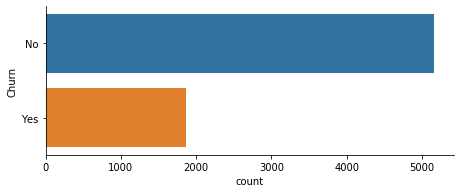

In [104]:
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

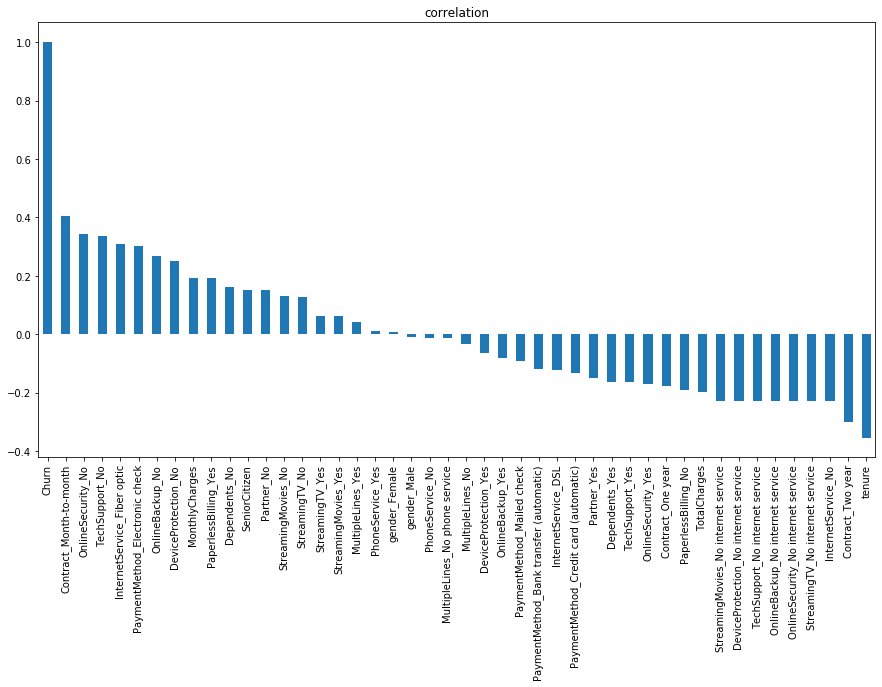

In [35]:
plt.figure(figsize=(15,8))
df3.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',title='correlation')

## On exploring the relation between different variables following patterns are observed:
* Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.
* Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.
 We will explore the patterns for the above correlations .


### 3.1 Numerical features

There are only three numerical columns: tenure, monthly charges and total charges. The probability density distribution can be estimate using the seaborn kdeplot function.


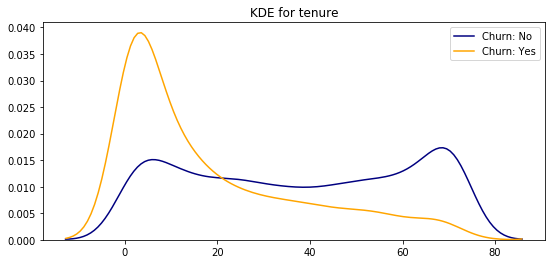

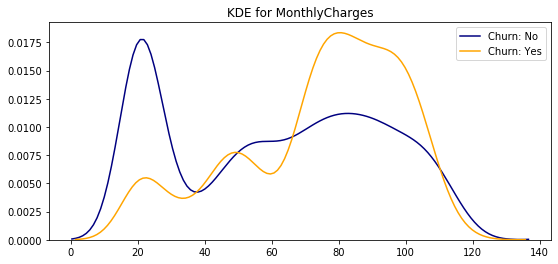

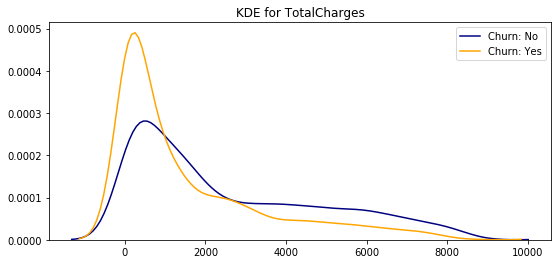

In [39]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

Using above graphs we can obseve that:
* Newer clients are more likely to churn
* Clients paying higher charges are also more likely to churn.
* Tenure and MonthlyCharges are probably important features

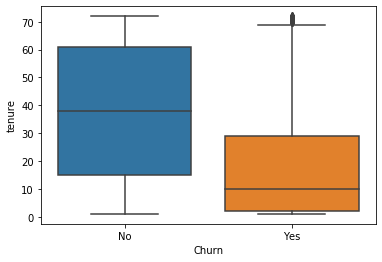

In [44]:
sns.boxplot(x = df.Churn, y = df.tenure)

Similar to what we saw in the correlation plot, the customers who have a month to month contract or shorter tenure are more likely to churn also more number of customers prefer shorter tenures as compared to longer ones.

## 3.2 Categorical features
* **Contract and charges:**

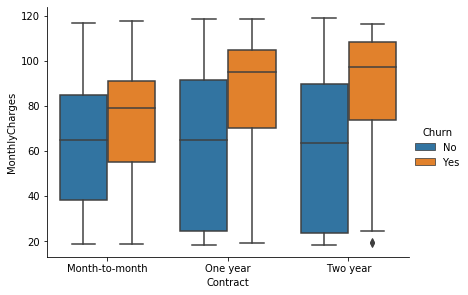

In [47]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=df, height=4.2, aspect=1.4)

**Following observations can be made from the above fig:**
* Customers having shorter contract are more likely to churn.
* Customers paying higher charges specialy ones having longer contracts are more likely to churn.


**Payment method:**

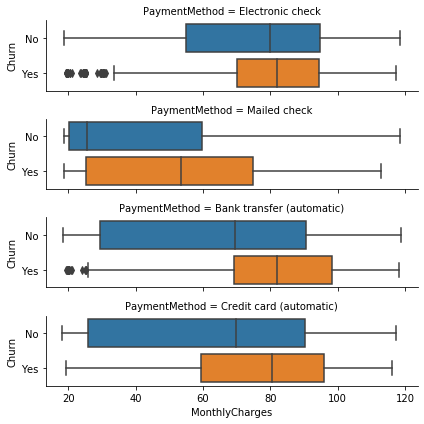

In [48]:
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=df, height=1.5, aspect=4, orient='h')

From above fig. we can observe that customers using online payment method are more likely to churn as compared to offline payment method (mailed check) and they also lower monthly charges which might also be contributing to the same.

**Gender and Age:**

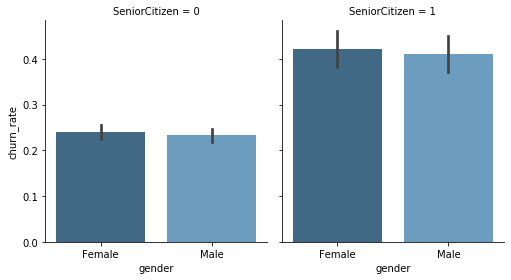

In [45]:
df['churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(df, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette = "Blues_d", order= ['Female', 'Male'])

* Churn rate does'nt depend upon gender.
* Although senior citizens form very small section of custmers but they have higher churn rate.

**Partner and dependents:**

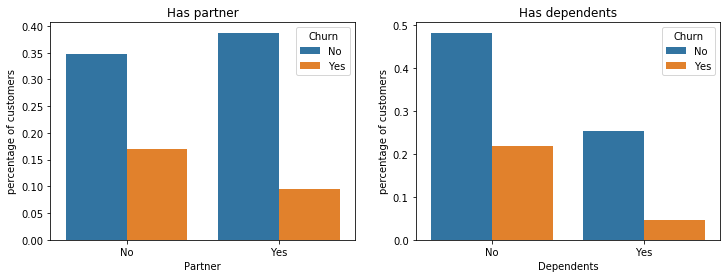

In [46]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

* Customers that have dependents or have partner are less likely to churn.
* This shows that customers that are single r don,t have family are more likely to churn.

**Internet Service:**

[]

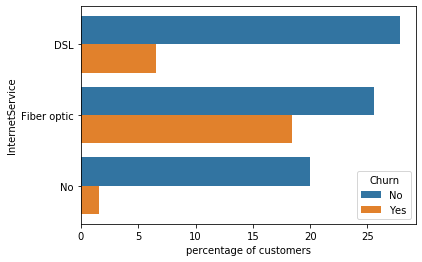

In [77]:
 g = df.groupby("InternetService")["Churn"].value_counts().to_frame()
 g = g.rename({"Churn": "percentage of customers"}, axis=1).reset_index()
g["percentage of customers"] = g["percentage of customers"]/len(df)*100
ax = sns.barplot(x= "percentage of customers", y="InternetService", hue='Churn', data=g)
ax.plot()


* Suprisingly customers having internet shows higher churn rate.
* Customers having slow internet like DSL are also less likely to churn.

**Additional Services:**

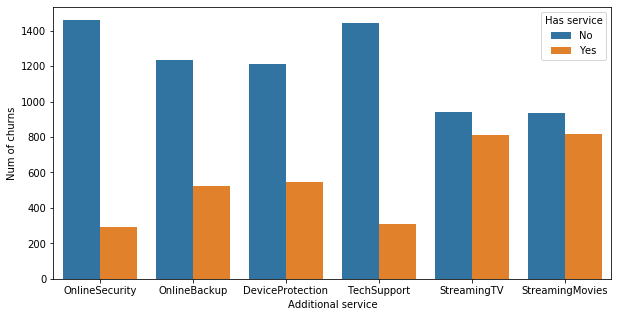

In [98]:
plt.figure(figsize=(10,5))
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df4 = df[(df.InternetService != "No") & (df.Churn == "Yes")]
df4 = pd.melt(df4[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df4, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

## 4. Data preprocessisng
 
 AS we have already done one hot encoding for categorical columns. Here we are scaling the numerical columnns.

In [119]:
num_cols={'tenure','TotalCharges','MonthlyCharges'}
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
scaled = std.fit_transform(df3[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)
scaled.head()

,MonthlyCharges,TotalCharges,tenure
0,-1.161694,-0.994194,-1.280248
1,-0.260878,-0.173740,0.064303
2,-0.363923,-0.959649,-1.239504
3,-0.747850,-0.195248,0.512486
4,0.196178,-0.940457,-1.239504


In [146]:
telcom = df3.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")
telcom.head()
telcom.dropna(inplace = True)

In [154]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
y = telcom['Churn'].values
X = telcom.drop(columns = ['Churn'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [155]:
model = LogisticRegression()
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
metrics.accuracy_score(y_test, prediction_test)

C:\Users\avichal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7906976744186046